<a href="https://colab.research.google.com/github/esthejas/Breast-Cancer-Classification/blob/main/Early_Detection_of_Breast_Cancer_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Early Detection of Breast Cancer using Machine Learning


##### *Import* Python Libraries


In [ ]:
# @title
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import svm

from sklearn.tree import export_graphviz

##### Import the DataSet into Pandas Library

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [ ]:
df = pd.read_csv('data.csv')
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### Describing the input data

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Checking for false data

In [ ]:
#returns the count of missing values for each column.
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Performing Feature Engineering by adding a new column, numerical diagnosis for better understanding.

In [ ]:
df['numerical_diagnosis'] = df['diagnosis'].replace(['M', 'B'], [1, 0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,numerical_diagnosis
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,0


### Dropping id, diagnosis columns

In [ ]:
#The 'id', 'diagnosis', and 'numerical_diagnosis' columns are dropped from the DataFrame, and the remaining columns are stored in X, which represents the features. 'numerical_diagnosis' is assigned to y, which represents the target variable. Used to understand the class distribution.
X = df.drop(['id','diagnosis', 'numerical_diagnosis'],axis=1)
y = df['numerical_diagnosis']

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: numerical_diagnosis, dtype: int64

In [ ]:
# Print feature names - 30 features describing the tumor
print(X.columns)


Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


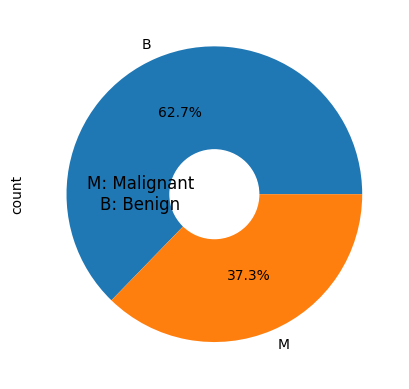

In [ ]:
# Creates a pie chart to visualize the distribution of the target variable ('diagnosis'). It shows the percentage of malignant and benign tumors in the dataset.
df['diagnosis'].value_counts().plot(kind='pie',autopct='%.1f%%')
circle = plt.Circle((0,0), 0.3, color='white')
plt.text(-0.5, 0, 'M: Malignant\nB: Benign', fontsize=12, ha='center', va='center')
plot = plt.gcf()
plot.gca().add_artist(circle)
plt.show()

###Visualization of Tumor Characteristics: Histograms of Key Features by Diagnosis

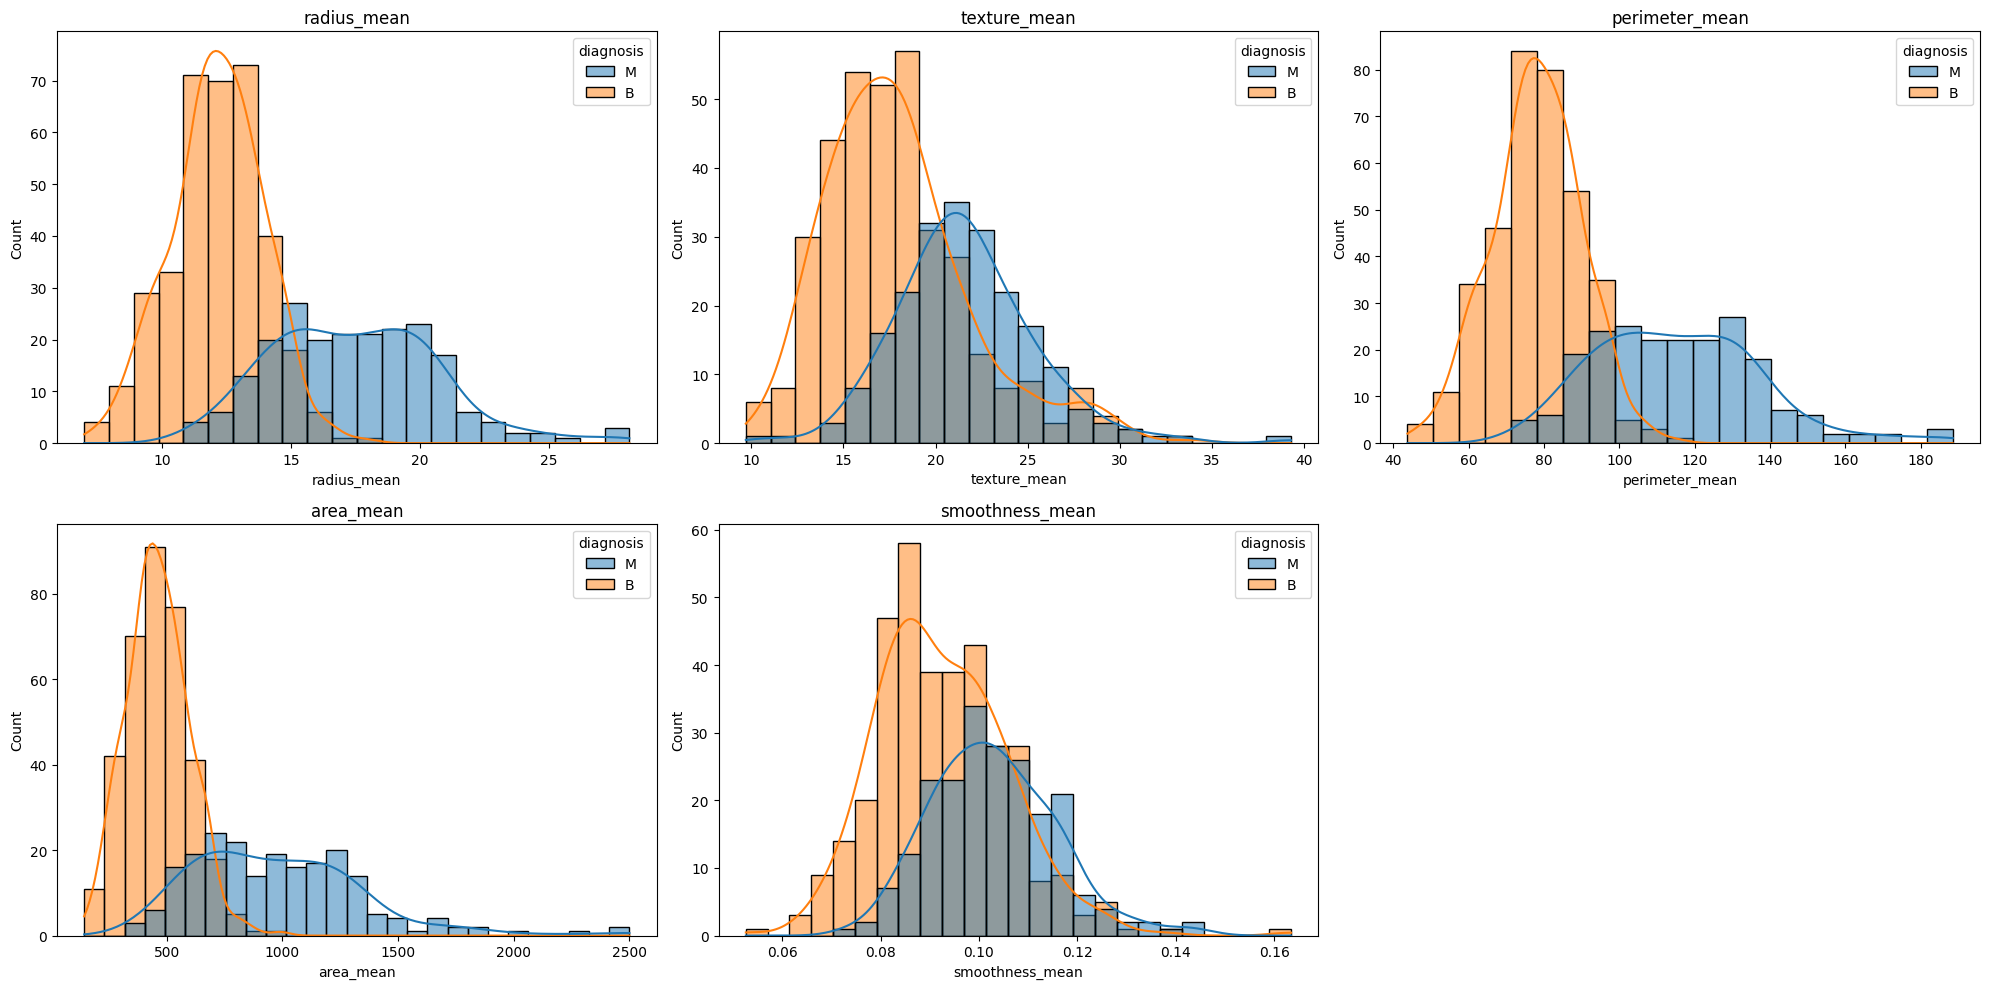

In [ ]:
# We will plot histograms for the narrowed down list of features to see their correlations
# As we have established in previous models that these few are the main variables for tumours
# This segment visualizes histograms of key tumor characteristics, specifically selected features, grouped by diagnosis (malignant or benign). It provides insight into how these features vary between malignant and benign tumors.

# Setting up the visualization
plt.figure(figsize=(20, 10))

# Selecting a subset of features for visualization
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
n_features = len(features)

# Creating subplots for each feature
for i in range(n_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df, x=features[i], hue='diagnosis', kde=True)
    plt.title(features[i])

plt.tight_layout()
plt.show()

###Visualization of Feature Correlations with Target: Correlation Matrix Heatmap

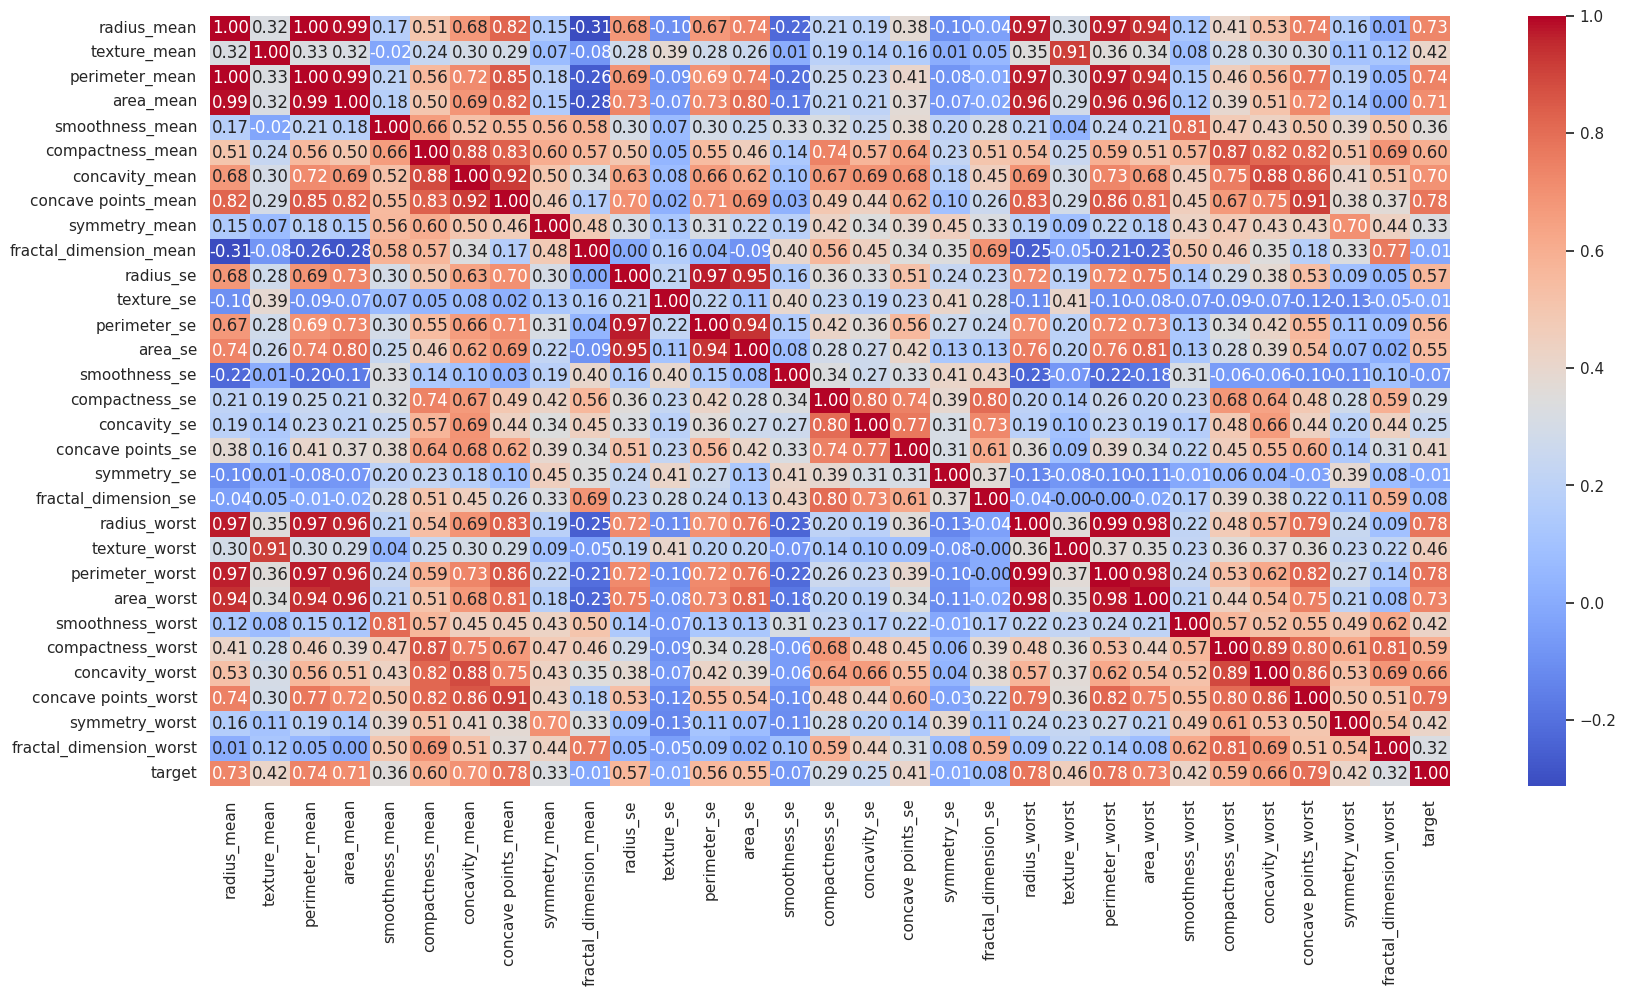

In [ ]:
# Create a Pandas dataframe from the X_train
df = pd.DataFrame(X, columns=X.columns)
df['target'] = y

sns.set(font_scale=1)
# Create a correlation matrix heatmap using seaborn
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

###Feature Selection: Removing Heavily Correlated Features except Mean Radius

In [ ]:
# Looks like we have some heavily correlated features (mean radius, mean perimeter, mean, area, worst radius, worst perimter, worst area)
# Removing all of those variables except for mean radius

# Delete columns from X by creating new arrays without the unwanted columns
X = X.drop(['perimeter_mean','area_mean', 'radius_worst', 'perimeter_worst', 'area_worst'],axis=1)

In [ ]:
print(X.shape)
print(y.shape)

(569, 25)
(569,)


###Visualization of Feature Distributions: Boxplots with Customized Outliers

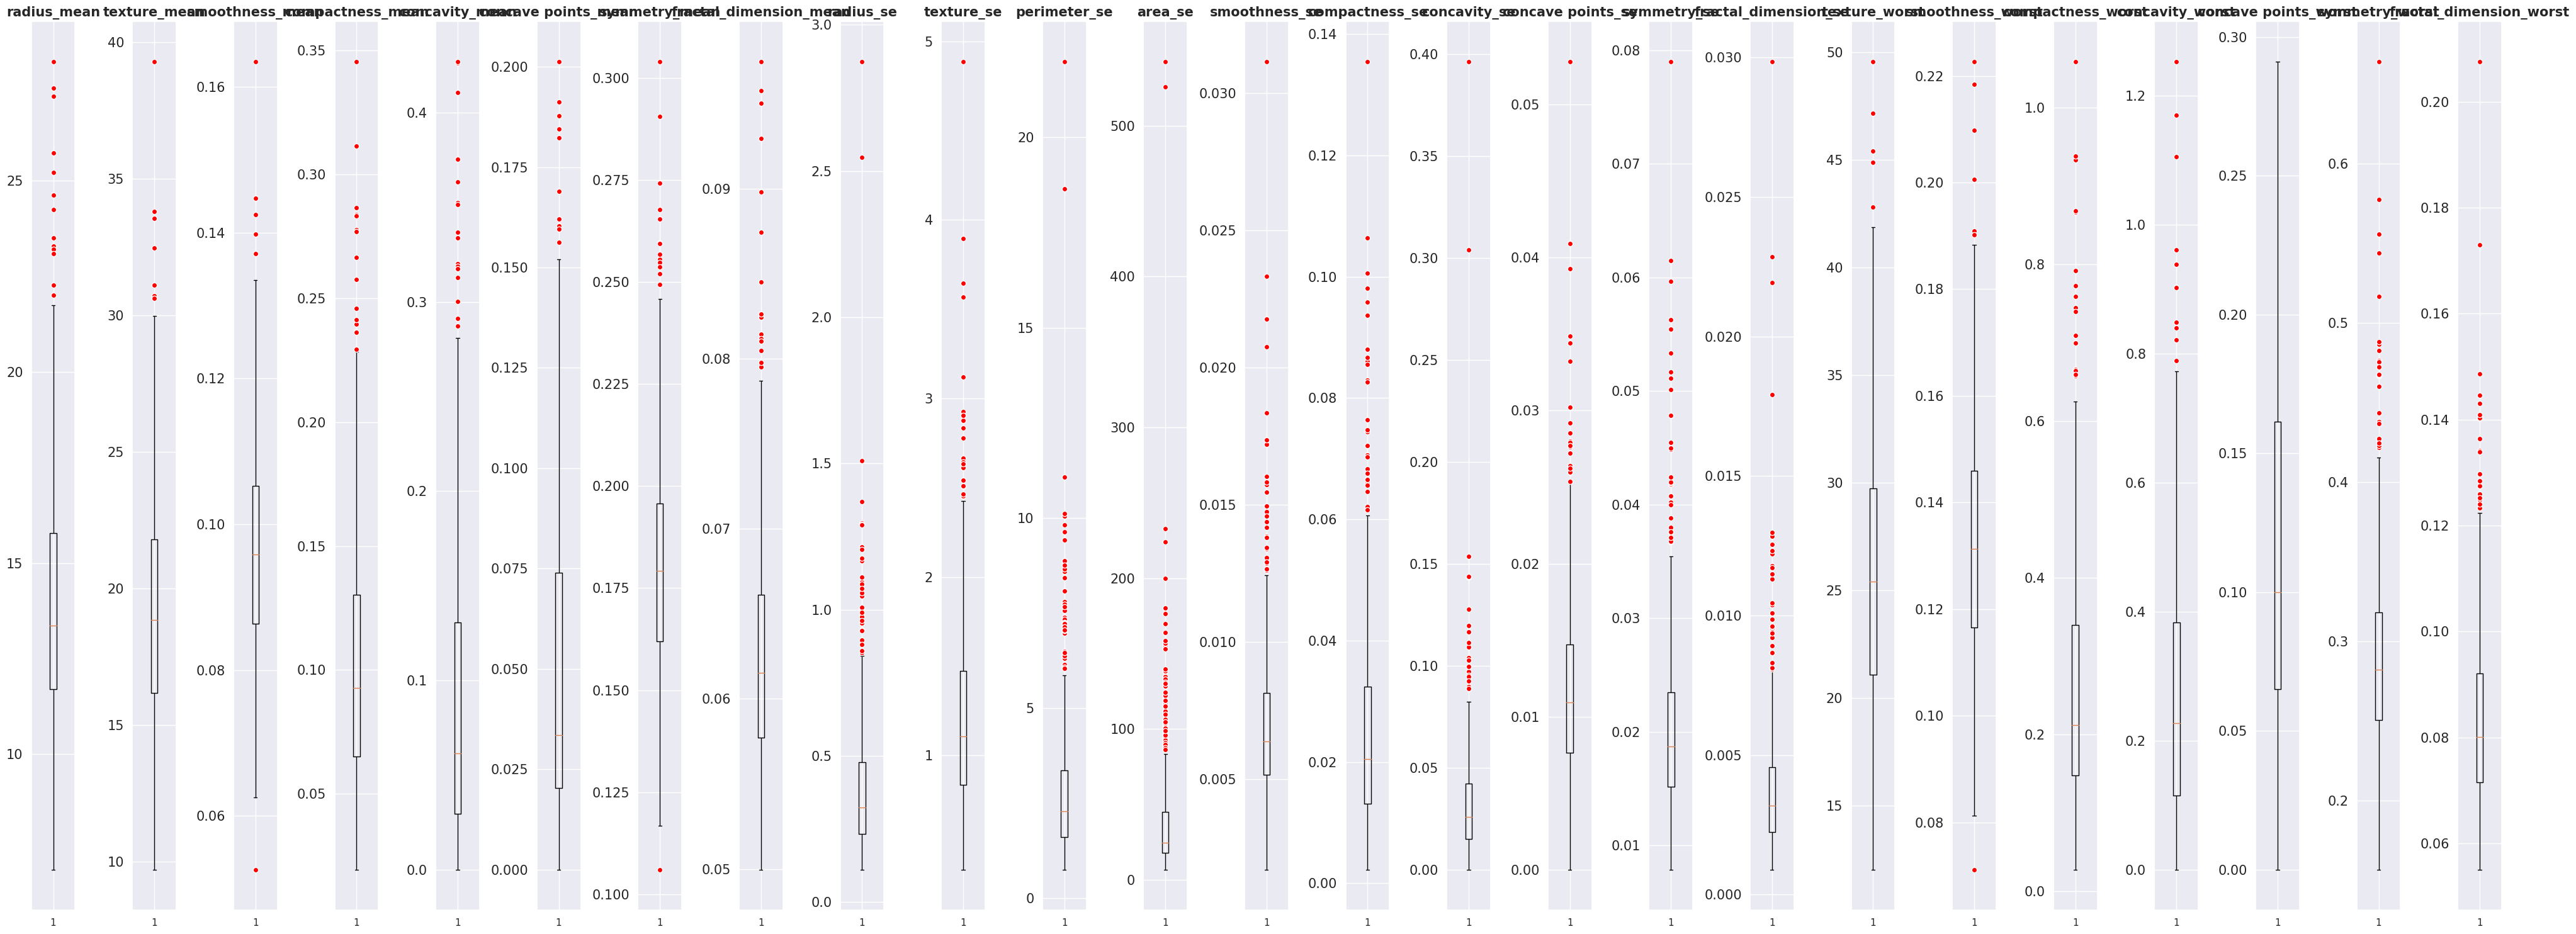

In [ ]:
# This section creates boxplots to visualize the distributions of features in the dataset. Each boxplot represents the distribution of a single feature, and outliers are highlighted with red circles.
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(X.columns), figsize=(40,15))

for i, ax in enumerate(axs.flat):
    ax.boxplot(X.iloc[:,i], flierprops=red_circle)
    ax.set_title(X.columns[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=15)

plt.tight_layout()


### Data Preparation for Modeling: SMOTE Sampling, Train-Test Split, and Cross-Validation Strategy

In [ ]:
# This part prepares the data for modeling. It oversamples the minority class using Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset. Then, it splits the dataset into training and testing sets, and defines a cross-validation strategy using repeated stratified k-fold.

# Apply SMOTE to the data to balance the observations
sm = SMOTE(random_state=42)
X_sampled, y_sampled = sm.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=1)

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

NameError: name 'SMOTE' is not defined

###Logistic Regression Model Evaluation with Pipeline: Cross-Validation, Test Set Performance, and Classification Report

In [ ]:
# In this segment, a Logistic Regression model is built and evaluated using a pipeline. The pipeline includes feature scaling using StandardScaler() and logistic regression classification. The model is evaluated using cross-validation on the training set and then tested on the test set. Accuracy scores are calculated for both train and test sets, and a classification report along with a confusion matrix visualization is generated to assess model performance.

# Define the pipeline
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),   # feature scaling
    ('lgr', LogisticRegression())   # classification
])


# Evaluate the model using cross-validation
lr_scores = cross_val_score(pipe_lr, X_train, y_train, cv=cv, scoring='accuracy')
print('Average Train set accuracy:', lr_scores.mean())

# Fit the pipeline on the training data
pipe_lr.fit(X_train, y_train)

# Evaluate the pipeline on the test data
lr_test_accuracy = pipe_lr.score(X_test, y_test)
print('Test set accuracy:', lr_test_accuracy)

# Predict the class labels for the test data
y_pred_lr = pipe_lr.predict(X_test)

# Calculate and print the classification report
print(classification_report(y_test, y_pred_lr))

### Confusion Matrix Visualization for Logistic Regression Model on Test Data

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator( pipe_lr,X_test,y_test,
                                              display_labels=pipe_lr.classes_, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

###Decision Tree Classifier Model Evaluation with Pipeline: Cross-Validation, Test Set Performance, and Classification Report

In [ ]:
# Similarly, this part builds and evaluates a Decision Tree Classifier model using a pipeline. The pipeline includes feature scaling and decision tree classification with a specified maximum depth. Cross-validation is performed, and the model is evaluated on the test set. Additionally, a decision tree visualization is generated and a classification report along with a confusion matrix visualization is provided.

from subprocess import call
from IPython.display import Image

# Define the pipeline
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(max_depth=4))
])

# Evaluate the model using cross-validation
cv = 5
dt_scores = cross_val_score(pipe_dt, X_train, y_train, cv=cv, scoring='accuracy')
print('Average Train set accuracy:', dt_scores.mean())

# Fit the pipeline on the training data
pipe_dt.fit(X_train, y_train)

# Export the decision tree as a dot file
export_graphviz(pipe_dt.named_steps['dt'],
                out_file='tree.dot',
                feature_names=X.columns,
                rounded=True, proportion=False,
                precision=2, filled=True,)

# Convert dot file to PNG image
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the PNG image
Image(filename='tree.png')

# Evaluate the pipeline on the test data
dt_test_accuracy = pipe_dt.score(X_test, y_test)
print('Test set accuracy:', dt_test_accuracy)

# Predict the class labels for the test data
y_pred_dt = pipe_dt.predict(X_test)

# Calculate and print the classification report
print(classification_report(y_test, y_pred_dt))


### Confusion Matrix Visualization for Decision Tree Classifier Model on Test Data

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator( pipe_dt,X_test,y_test,
                                              display_labels=pipe_dt.classes_, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Random Forest Classifier Model Evaluation with Pipeline: Cross-Validation, Test Set Performance, and Classification Report

In [ ]:
# Lastly, this section builds and evaluates a Random Forest Classifier model using a pipeline. Similar to the previous models, it includes feature scaling and Random Forest classification with specified parameters. Cross-validation is performed, and the model is evaluated on the test set. A classification report along with a confusion matrix visualization is provided to assess model performance.

# Define the pipeline
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 10, random_state = 1))
])


# Evaluate the model using cross-validation
rf_scores = cross_val_score(pipe_rf, X_train, y_train, cv=cv, scoring='accuracy')
print('Average Train set accuracy:', rf_scores.mean())

# Fit the pipeline on the training data
pipe_rf.fit(X_train, y_train)

# Evaluate the pipeline on the test data
rf_test_accuracy = pipe_rf.score(X_test, y_test)
print('Test set accuracy:', rf_test_accuracy)

# Predict the class labels for the test data
y_pred_rf = pipe_rf.predict(X_test)

# Calculate and print the classification report
print(classification_report(y_test, y_pred_rf))

### Confusion Matrix Visualization for Random Forest Model on Test Data

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator( pipe_rf,X_test,y_test,
                                              display_labels=pipe_rf.classes_, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### Support Vector Machine (SVM) Classifier Model Evaluation with Pipeline: Cross-Validation, Test Set Performance, and Classification Report

In [ ]:
# Define the pipeline
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.SVC())
])


# Evaluate the model using cross-validation
svm_scores = cross_val_score(pipe_svm, X_train, y_train, cv=cv, scoring='accuracy')
print('Average Train set accuracy:', rf_scores.mean())

# Fit the pipeline on the training data
pipe_svm.fit(X_train, y_train)

# Evaluate the pipeline on the test data
svm_test_accuracy = pipe_svm.score(X_test, y_test)
print('Test set accuracy:', svm_test_accuracy)

# Predict the class labels for the test data
y_pred_svm = pipe_svm.predict(X_test)

# Calculate and print the classification report
print(classification_report(y_test, y_pred_svm))

Confusion Matrix Visualization for Decision Tree Classifier Model on Test Data

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator( pipe_svm,X_test,y_test,
                                              display_labels=pipe_svm.classes_, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()